In [1]:
#!/usr/bin/env python3

# read text files

import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal, fftpack
from scipy.signal import savgol_filter
%matplotlib inline

# enter data file here

data_file = "data_file_03-31-19_16-48-40"



path = "/Users/elenakern/university/masters/sai-2/apps/inertial_parameter_application/data_collection/simulation/forces/"

# path = "/home/elenakern/Codes/sai2.0/applications/data_collection/simulation/inertial_params_est/"
path_data_file = path + data_file

file = np.loadtxt(path_data_file,skiprows=1)

ft = file[0::,0:6]      #virtual force
ft_des = file[0::,6:12]     #desired virtual force
f = file[0::,0:3]      #virtual force
t = file[0::,3:6]  
f_des = file[0::,6:9]      #virtual force
t_des = file[0::,9:12]  
time = np.arange(np.size(ft_des[:,0]))
time = time/1000


In [2]:
#TUM colors rgb
blue = (0,0.3961,0.7412)
red = (0.7686,0.0275,0.1059)
green =(0,0.4863,0.1882)
orange =  (0.8902, 0.4471, 0.1333)
purple = (0.4118, 0.0314, 0.3529)
grey = (0.6118, 0.6157, 0.6235)
yellow = (0.9765, 0.7294, 0)


In [3]:
def Plot_three_dim(time, data_1,data_2, ylabel,label_1, label_2, subtitle, savename):
    f, axarr = plt.subplots(3,1,figsize=(7,9))
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx,coordinate in enumerate(coordinates):
        axarr[idx].plot(time, data_1[:,idx], c=blue, label = label_1)
        axarr[idx].plot(time, data_2[:,idx], c=red, label = label_2)
        axarr[idx].set_title(subtitle+str(coordinate))
        axarr[idx].set_xlim([0, time[-1]])
        axarr[idx].set_ylabel(ylabel)
        axarr[idx].legend()
    axarr[2].set_xlabel("Elapsed time in $s$")
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.savefig(savename)
    
def Plot_three_dim_two(time, data_1,data_2, ylabel,label_1, label_2, subtitle):
    f, axarr = plt.subplots(3,2,figsize=(7,9))
    coordinates = ["$_x$","$_y$","$_z$"]
    for idx,coordinate in enumerate(coordinates):
        axarr[idx,0].plot(time, data_1[:,idx], c=blue, label = label_1)
        axarr[idx,0].set_title(subtitle+str(coordinate))
        axarr[idx,0].set_xlim([0, time[-1]])
        axarr[idx,0].set_ylabel(ylabel)
        axarr[idx,0].legend()
    for idx,coordinate in enumerate(coordinates):
        axarr[idx,1].plot(time, data_2[:,idx], c=red, label = label_2)
        axarr[idx,1].set_title(subtitle+str(coordinate))
        axarr[idx,1].set_xlim([0, time[-1]])
        axarr[idx,1].set_ylabel(ylabel)
        axarr[idx,1].legend()
    axarr[2].set_xlabel("Elapsed time in $s$")
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)

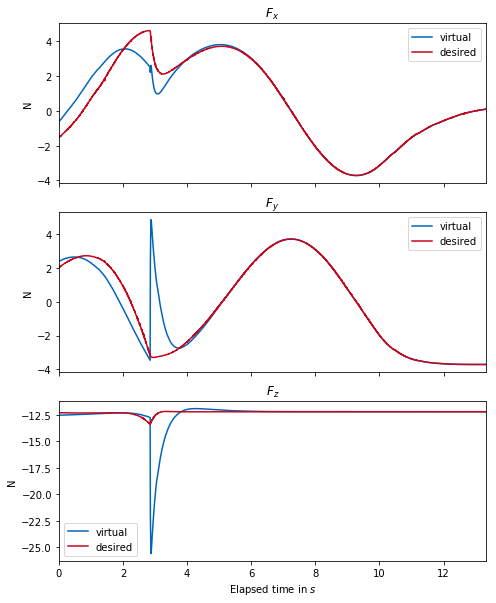

In [4]:
Plot_three_dim(time, f, f_des,"N", "virtual", "desired", "$F$", "F_1.png")

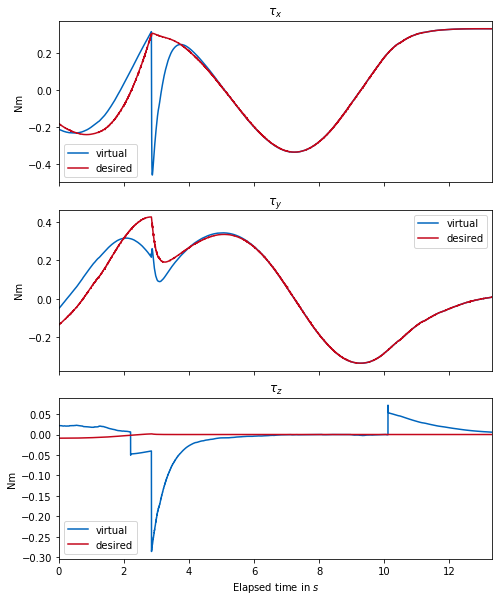

In [5]:
Plot_three_dim(time, t, t_des,"Nm", "virtual", "desired", "$τ$", "T_1.png")